In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


In [2]:
from ucimlrepo import fetch_ucirepo
print("Installed Successfully!")


Installed Successfully!


In [3]:
from ucimlrepo import fetch_ucirepo
air_quality=fetch_ucirepo(id=360)
data=air_quality.data.features
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
df=data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]

In [5]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [6]:
df.dtypes

CO(GT)      float64
C6H6(GT)    float64
NOx(GT)       int64
NO2(GT)       int64
dtype: object

In [7]:
n_estimators=100 #No.of trees in the forest
max_samples='auto' #No.of samples to draw from the dataset
contamination=0.01 #Percentage of outliers in the data
sample_size=256

In [8]:
#Train the isolation forest model
model=IsolationForest(n_estimators=n_estimators,contamination=contamination,max_samples=sample_size,random_state=42)

In [9]:
model.fit(df)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",256
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.01
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [10]:
anomaly_labels=model.predict(df)
df['anomaly']=anomaly_labels

C:\Users\spand\AppData\Local\Temp\ipykernel_5804\2556069094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly']=anomaly_labels


In [11]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [12]:
df['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

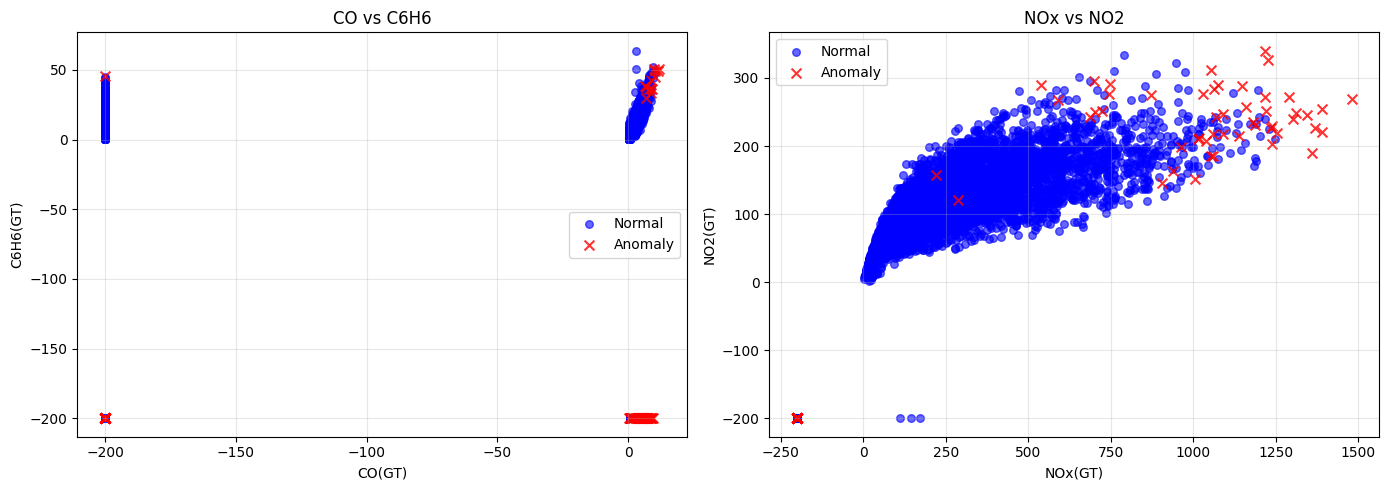

Normal data points: 9263
Anomaly data points: 94


In [19]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
normal=df[df['anomaly']==1]
anomaly=df[df['anomaly']==-1]
#Plot1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'],normal['C6H6(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
axes[0].scatter(anomaly['CO(GT)'],anomaly['C6H6(GT)'],color='red',label='Anomaly',alpha=0.8,s=50,marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True,alpha=0.3)
#Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'],normal['NO2(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
axes[1].scatter(anomaly['NOx(GT)'],anomaly['NO2(GT)'],color='red',label='Anomaly',alpha=0.8,s=50,marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Normal data points: {len(normal)}")
print(f"Anomaly data points: {len(anomaly)}")

In [23]:
#Save the mdoel
import joblib
model_path = r"C:\AIDS Tekworks\17-02-2026\anomaly_model.pkl"
joblib.dump(model, model_path)

['C:\\AIDS Tekworks\\17-02-2026\\anomaly_model.pkl']